# Milk Quality Prediction

**Import Library**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

**Membaca Dataset**

In [22]:
data = pd.read_csv('milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


**Visualisasi Pair Plot**

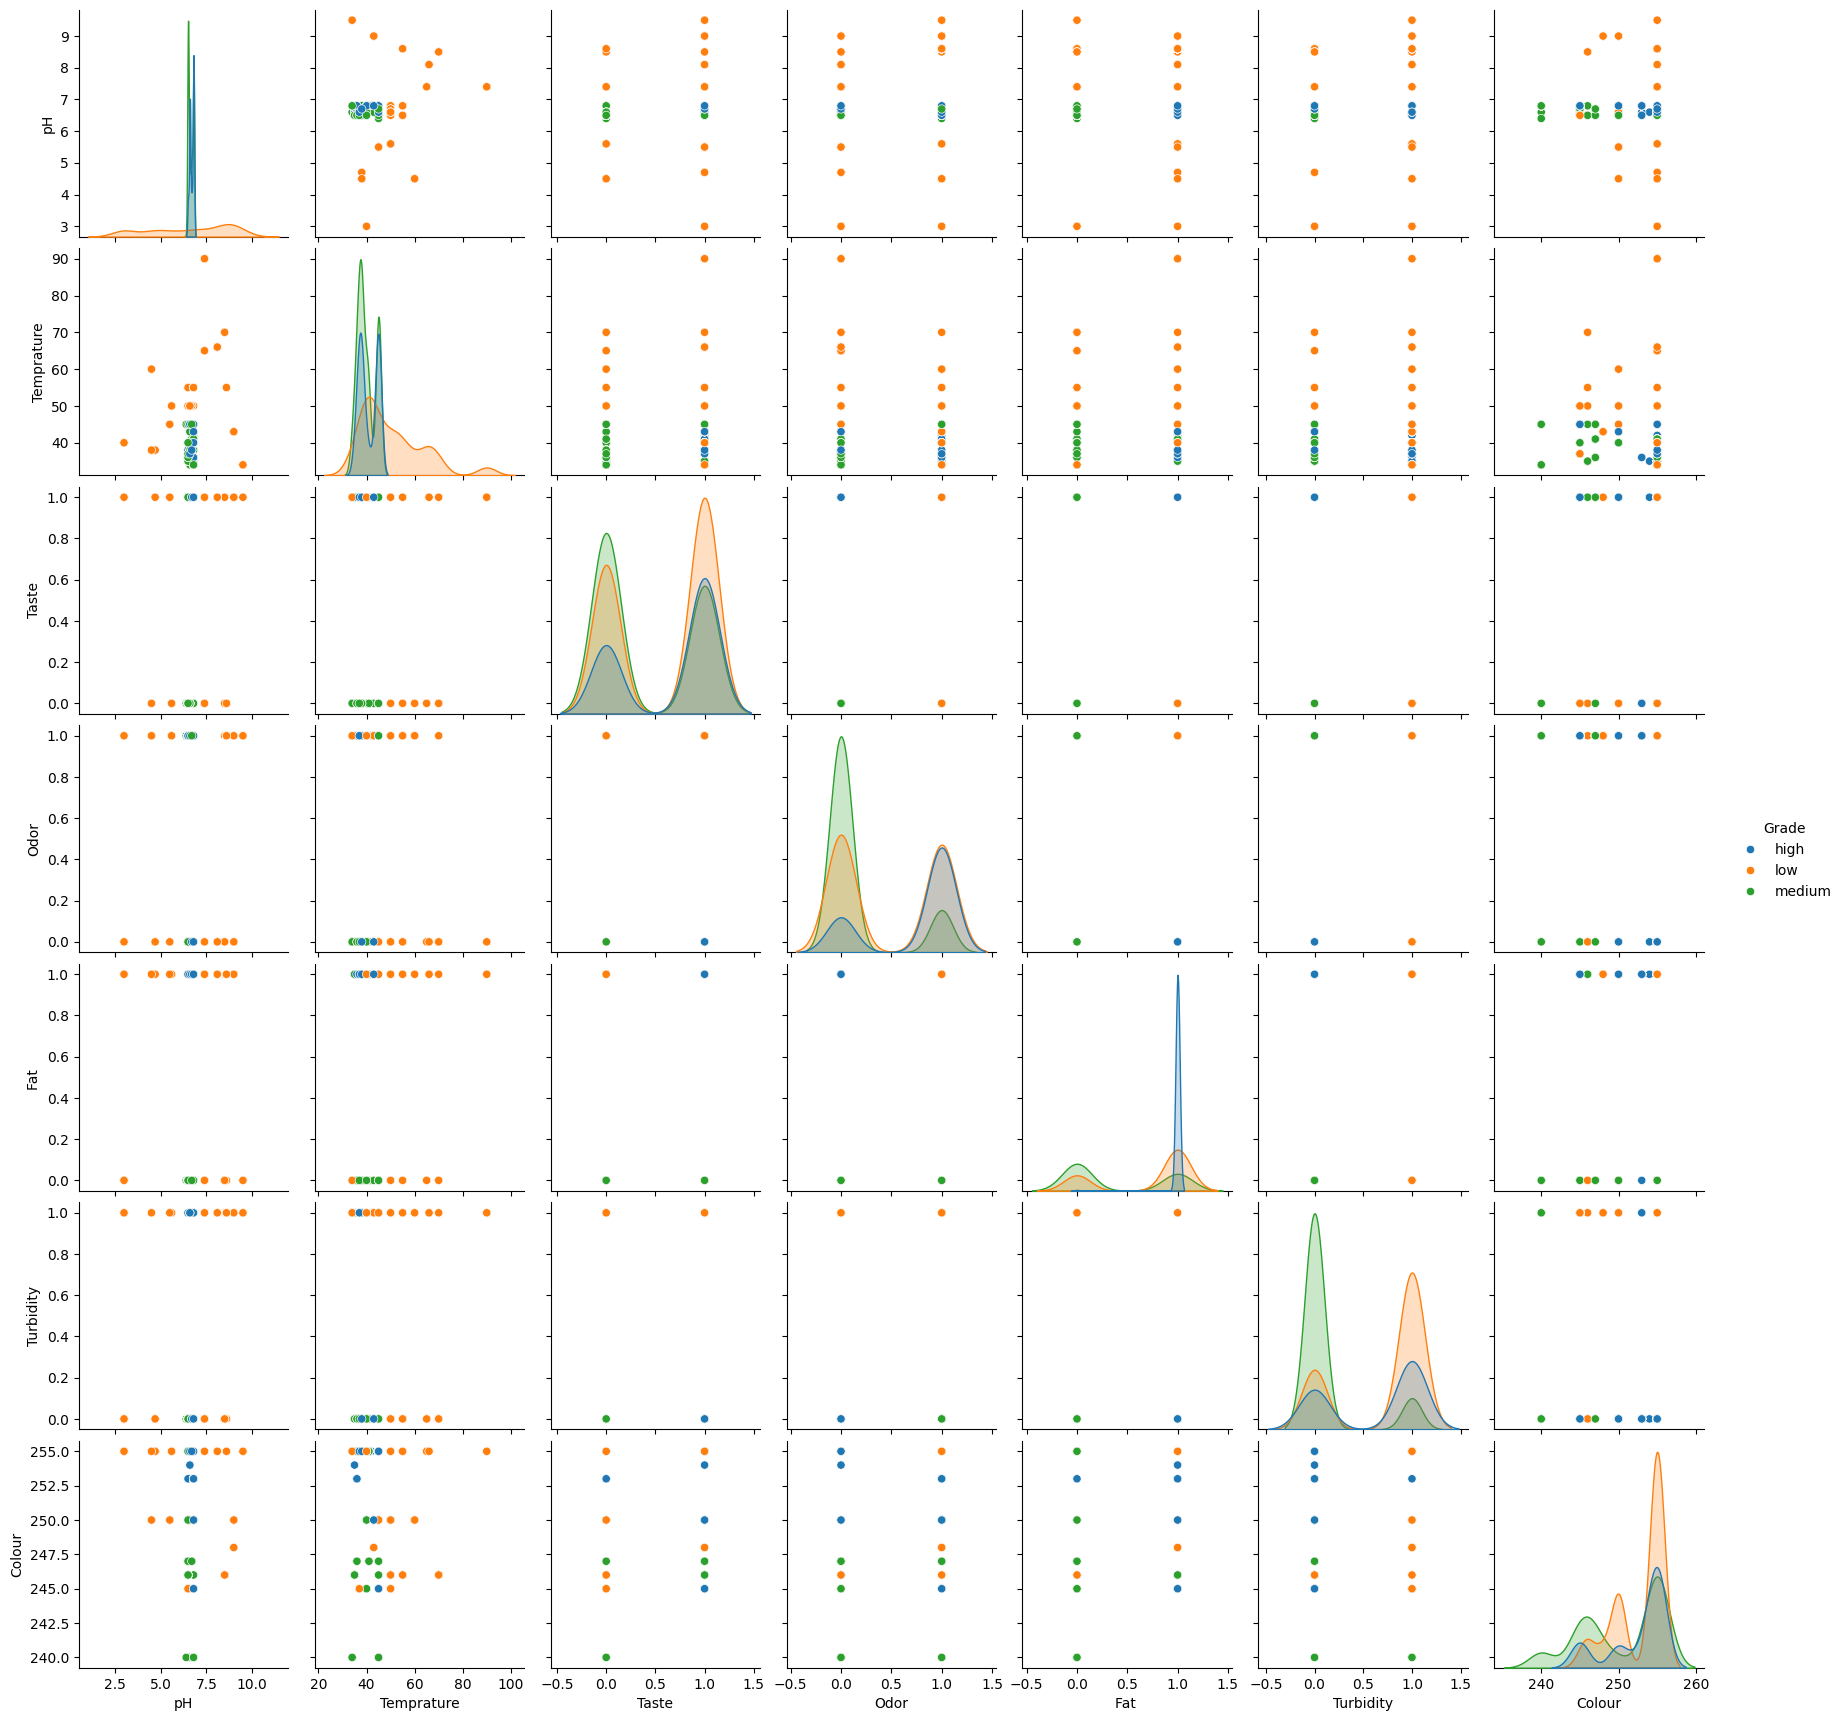

In [23]:
sns.pairplot(data=data, hue = 'Grade', kind='scatter')

**Korelasi Fitur**

--- Visualisasi Heatmap Korelasi ---


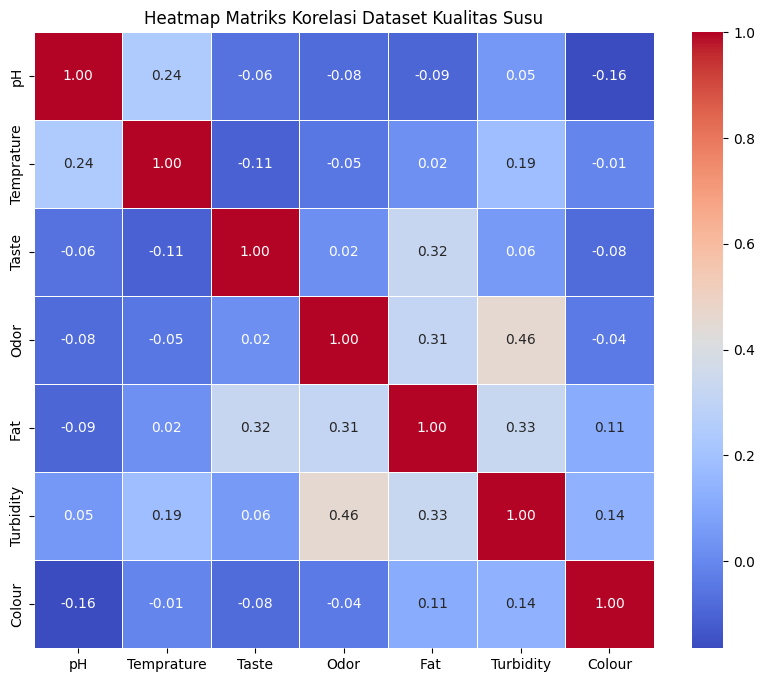

In [24]:
print("--- Visualisasi Heatmap Korelasi ---")
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Dataset Kualitas Susu')
plt.show()

**Label Encoding**

In [25]:
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

Menampilkan Informasi Umum Dataset

In [26]:
print("Jumlah baris dan kolom:", data.shape)
print("\nInformasi Kolom:")
print(data.info())

Jumlah baris dan kolom: (1059, 8)

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB
None


Menampilkan nilai-nilai dari kolom target Grade, yang merupakan hasil prediksi (high = 0, low = 1, medium = 2).

In [27]:
print(data ['Grade'].values)

[0 0 1 ... 1 0 1]


Memisahkan fitur dan target

In [28]:
X = data.drop(columns='Grade') 
y = data['Grade']  # pastikan nama outcome sesuai

print("Fitur:", X.columns.tolist())
print("Jumlah data:", len(X))

Fitur: ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
Jumlah data: 1059


Membagi data menjadi data latih dan data uji

In [35]:
# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=600)

# Normalisasi fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Visualisasi Training Set**

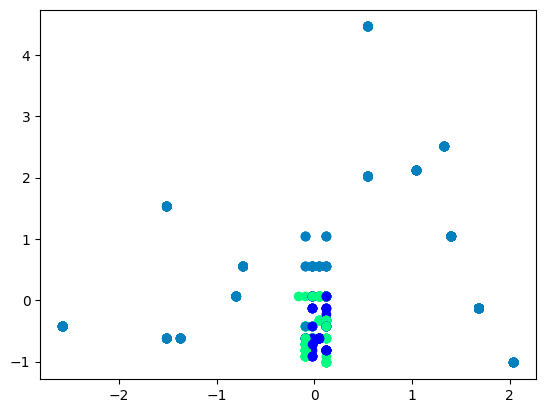

In [36]:
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

Membuat dan melatih model Support Vector Classification

In [37]:
# Buat model SVM dengan kernel RBF
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

Memprediksi hasil dari data uji

In [38]:
y_pred = model.predict(X_test)
print(y_pred)

[1 2 1 1 0 0 2 2 1 0 0 1 1 1 0 0 1 2 2 2 2 2 1 2 2 1 2 2 0 0 0 1 2 1 1 2 2
 2 2 0 2 2 1 1 0 1 2 1 2 1 1 2 2 1 1 2 1 0 2 0 0 1 0 0 0 1 1 2 0 0 0 2 2 1
 1 2 2 2 1 2 1 0 1 2 1 0 0 2 0 2 2 0 1 0 1 1 0 0 2 1 2 0 1 1 1 0 1 2 0 0 1
 2 1 0 0 1 0 1 2 2 0 0 0 0 2 0 2 1 2 1 2 0 2 1 1 2 1 1 2 2 1 1 2 1 2 2 0 1
 1 0 1 0 1 2 1 2 2 2 2 1 0 2 1 2 2 1 2 1 1 1 1 1 0 0 1 0 2 1 1 0 2 1 1 2 0
 1 0 1 1 1 0 0 2 2 0 1 0 0 0 2 0 2 0 0 2 1 2 1 0 1 1 1]


Actual y_test value

In [39]:
print(y_test.values)

[1 2 1 1 0 0 2 2 1 0 0 1 1 1 0 0 1 2 2 2 2 2 1 2 2 1 2 2 0 0 2 1 2 1 1 2 2
 2 2 0 2 2 1 1 0 1 2 1 2 1 1 2 2 1 1 2 1 0 2 2 0 1 0 0 0 1 1 2 0 0 0 2 2 1
 1 2 2 2 1 2 1 0 1 2 1 0 0 2 0 2 2 0 1 0 1 1 0 0 2 1 2 0 1 1 1 0 1 2 0 2 1
 2 1 0 0 1 0 1 2 2 0 0 0 0 2 0 2 1 2 1 2 2 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1
 1 0 1 0 1 2 1 2 2 2 2 1 0 2 1 2 2 1 2 1 1 1 1 1 2 0 1 0 2 1 1 0 2 1 1 2 2
 1 0 1 1 1 0 0 2 2 0 1 0 0 0 2 0 2 0 0 2 1 2 1 0 1 1 1]


Evaluasi model

In [42]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9669811320754716
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      1.00      1.00        80
           2       1.00      0.91      0.95        78

    accuracy                           0.97       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.97      0.97       212



**Confusion Matrix**

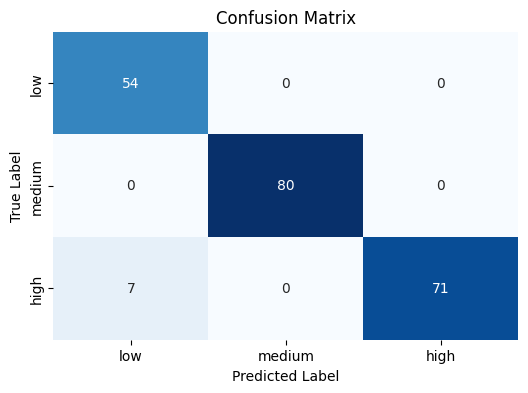

In [ ]:
print("--- Confusion Matrix ---")

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap dari confusion matrix
plt.figure(figsize=(6, 4))
labels = ['low', 'medium', 'high']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Visualisasi Decision Boundary**

In [54]:
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

# Buat model baru khusus visualisasi
from sklearn.svm import SVC
model_2D = SVC(kernel='rbf')
model_2D.fit(X_train_2D, y_train)

SVC()

C:\Users\USER.LAPTOP-I5FQJV1F\AppData\Local\Temp\ipykernel_7152\3882895470.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


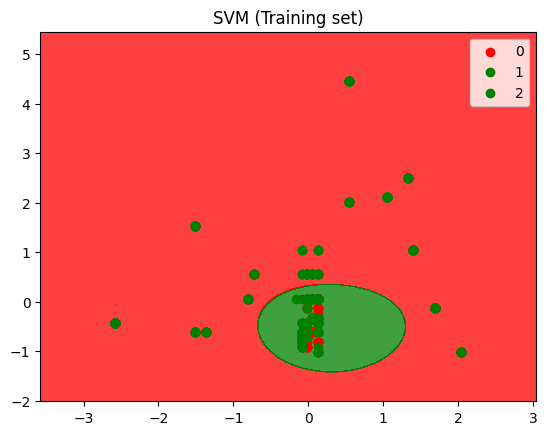

In [58]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01)
)

plt.contourf(
    X1, X2, model_2D.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.legend()
plt.show()

C:\Users\USER.LAPTOP-I5FQJV1F\AppData\Local\Temp\ipykernel_7152\1508951599.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


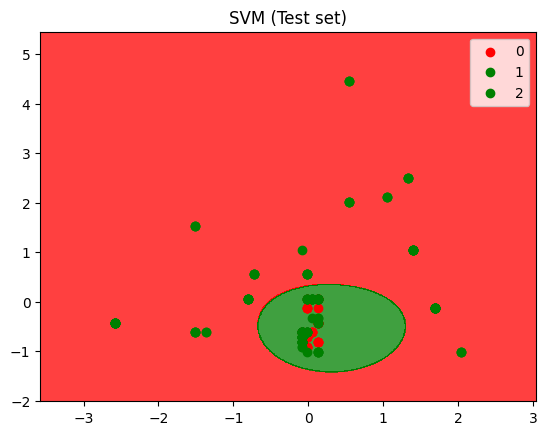

In [57]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01)
)

plt.contourf(
    X1, X2, model_2D.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.legend()
plt.show()